# PROJECT BigMart Sales Prediction: 
Applying Data Science Methodology to elaborate Predictive Models<br>
<br>
The files can be downloaded from: http://datahack.analyticsvidhya.com/contest/practice-problem-bigmart-sales-prediction
<br>
**Problem Statement:**<br>
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store. Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.<br>
<br>
**Solution:**<br>
Find out the properties of a product and store which one impacts the sales of a product. Define actions using those properties in order to increase sales.<br>
<br>

# 1. Business Hypotheses: <br>
Source Analytics Vidhya<br>
List of suggested hypotheses about properties impacting sales of a product<br>
<br>
**@ Store Level**<br>
**1.City type:** Stores located in urban or Tier 1 cities should have higher sales because of the higher income levels of people there.<br>
**2.Population Density:** Stores located in densely populated areas should have higher sales because of more demand.<br>
**3.Store Capacity:** Stores which are very big in size should have higher sales as they act like one-stop-shops and people would prefer getting everything from one place.<br>
**4.Competitors:** Stores having similar establishments nearby should have less sales because of more competition.<br>
**5.Marketing:** Stores which have a good marketing division should have higher sales as it will be able to attract customers through the right offers and advertising.<br>
**6.Location:** Stores located within popular marketplaces should have higher sales because of better access to customers.<br>
**7.Customer Behavior:** Stores keeping the right set of products to meet the local needs of customers will have higher sales.<br>
**8.Ambiance:** Stores which are well-maintained and managed by polite and humble people are expected to have higher footfall and thus higher sales.<br>
<br>
**@ Product Level**<br>
**1.Brand:** Branded products should have higher sales because of higher trust in the customer.<br>
**2.Packaging:** Products with good packaging can attract customers and sell more.<br>
**3.Utility:** Daily use products should have a higher tendency to sell as compared to the specific use products.<br>
**4.Display Area:** Products which are given bigger shelves in the store are likely to catch attention first and sell more.<br>
**5.Visibility in Store:** The location of product in a store will impact sales. Ones which are right at entrance will catch the eye of customer first rather than the ones in back.<br>
**6.Advertising:** Better advertising of products in the store will should higher sales in most cases.<br>
**7.Promotional Offers:** Products accompanied with attractive offers and discounts will sell more.<br>

# 2. Data Exploration :<br>
**FILE STRUCTURE ANALYSIS: FIELDS and DESIGNATION**<br>
**Item_Identifier**, Unique Product ID<br>
**Item_Weight**, Weight of Product<br>
**Item_Fat_Content**, Level of fat of the Product<br>
**Item_Visibility**, ratio product display area / total display area<br>
**Item_Type**, Category of the product<br>
**Item_MRP**, Maximum retail price<br>
**Outlet_Identifier**, Unique store ID<br>
**Outlet_Establishment_Year**, Year of establishment of store<br>
**Outlet_Size**, Type of size of store<br>
**Outlet_Location_Type**, Type of city pf the store<br>
**Outlet_Type**, Type of Outlet<br>
**Item_Outlet_Sales**, Outcome variable<br>
<br>
**FIELDS and their RELATION to HYPOTHESIS**<br>
**Item_Identifier**, ID Variable<br>
**Item_Weight**, No relation with any hypotheses<br>
**Item_Fat_Content**, related to Product:Utility hypothesis since Low Fat level product are used daily <br>
**Item_Visibility**, directly related to Product:Display area hypothesis<br>
**Item_Type**, directly related to Product:Utility and to the nature of product needed bt the customer<br>
**Item_MRP**, Not used in above hypothesis <br>
**Outlet_Identifier**, ID Variable<br>
**Outlet_Establishment_Year**, Not used in above hypothesis <br>
**Outlet_Size**, Related to Store:Store Capacity hypothesis<br>
**Outlet_Location_Type**, Related to Store:City type hypothesis<br>
**Outlet_Type**, Related to Store:Store Capacity hypothesis<br>
**Item_Outlet_Sales**, Outcome variable<br>

We will keep 6 features hypothesed out of 9 listed in the data file.
The data can be downloaded from the competition page.
Since the data is delivered through a train and test files, let's consolidate 
this data in order to explore it and apply feature engineering to one file only.

In [3]:
import pandas as pd
import numpy as np

#Readimg files:
path="/Users/everm/DATA SCIENCE STUDIES/"
train = pd.read_csv(path + "Train_UWu5bXk.csv")
test = pd.read_csv(path + "Test_u94Q5KV.csv")
train['source']='train'
test['source']='test'
data = pd.concat([train, test],ignore_index=True)
print (train.shape, test.shape, data.shape)

(8523, 13) (5681, 12) (14204, 13)


The file "data" has been created successfully since 13 columns along with 14.204 rows are now available in the file.<br>
Let's look now if missing values needs to be treated.<br>
** Missing values **<br>

In [53]:
data.apply(lambda x: sum(x.isnull()))

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

The variable Outlet_Sales has 5681 missing values coming from the test set and those values will be predicted later since this is the target variable.<br> Item_Weight and Outlet_Size, on the other hand, need some values which will be calculated in a later section.<br>
Let's have a look now at some basic statistics related to numerical variables:<br>

In [54]:
data.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.652502,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


Observations:<br>
**1. Item_Visibility** has a minimum value of 0.00 which can be considered as a missing value since a product has always a display area associated with it as well as  a strict positive ratio ( product display area / total display area )<br>
**2. Outlet_Establishment_year** should be converted into a number of years, representing the age of the store, with a maximum of 2009 - 1985 = 24 years.<br>
**3. Weight** has a lower count which is justified by the missing values seen above.<br>
**4. Outlet_sales** has also a lower count because of its nature of target variable and some lack of information in the test file.<br>
<br>
Let's now have a look at some properties of the categorical features of our file and determine what is the number of unique values for each of them.<br>


In [55]:
data.apply(lambda x: len(x.unique()))

Item_Fat_Content                 5
Item_Identifier               1559
Item_MRP                      8052
Item_Outlet_Sales             3494
Item_Type                       16
Item_Visibility              13006
Item_Weight                    416
Outlet_Establishment_Year        9
Outlet_Identifier               10
Outlet_Location_Type             3
Outlet_Size                      4
Outlet_Type                      4
source                           2
dtype: int64

This list describes 1559 differents products belonging to 16 types or categories which are sold by 10 differents outlets/stores. Those outlets belongs to 3 types of location, are classified into 4 different sizes and 4 differents nature of outlet.<br> Let's see what values are used for each nominal variable and determine their frequency.

In [56]:
#Filter categorical variables vs numerical ones
categorical_columns = [x for x in data.dtypes.index if data.dtypes[x]=='object']
#Exclusion of ID variables and source:
categorical_columns = [x for x in categorical_columns if x not in ['Item_Identifier','Outlet_Identifier','source']]
#Print frequency of categories
for col in categorical_columns:
    print ('\nFrequency of Categories: Variable %s'%col)
    print (data[col].value_counts())


Frequency of Categories: Variable Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Frequency of Categories: Variable Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Frequency of Categories: Variable Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

Frequency of Categories: Variable Outlet_Size
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

Frequency

Observations:<br>
**1. Item_Fat_Content:** Some values like "Low Fat", "LF" or "low fat" must be merged into only one value like "Low Fat"<br>
**2. Item_type** There are some important differences of frequency between categories. Combining some of them might give better results<br>
**3. Outlet_type** Supermarket Type2 and Type 3 shows the same numbers in frequency. If the means show the same patterns, those two categories should be combined.<br>

Now that we have explored the data, let's do some data cleaning by following all the above observations.

# 3. DATA CLEANING : <br>
<br>
** MISSING VALUES for Item_Weight & Outlet_Size **<br>
<br>
Missing values on Item_weight can be filled with the average weight of this Item.<br>


In [57]:
# Determine the average weight per item:
item_avg_weight = data.pivot_table(values='Item_Weight', index='Item_Identifier')

#Get a boolean variable specifying missing Item_Weight values
miss_bool = data['Item_Weight'].isnull() 
#Imput data and check #missing values before and after imputation to confirm
print ('Original #missing: %d'% sum(miss_bool))
data.loc[miss_bool,'Item_Weight'] = data.loc[miss_bool,'Item_Identifier'].apply(lambda x: item_avg_weight[x])
print ('Final #missing: %d'% sum(data['Item_Weight'].isnull()))


Original #missing: 2439
Final #missing: 0


Missing values has been successfully replaced by average weight value per item<br>
Let's fill out now categorical variable Outlet_Size showing missing values with its mode. <br>

In [58]:
#Import mode function:
from scipy.stats import mode

#Determing the mode for each
#outlet_size_mode = data.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x:mode(x).mode[0]) )
#outlet_size_mode = data.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x:mode(x).mode[0]) )
#index='Item_Identifier')
outlet_size_mode = data.dropna(subset=['Outlet_Size']).pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x:mode(x).mode[0]), dropna=True)
#print ('Mode for each Outlet_Type:')
#print (outlet_size_mode)

#Get a boolean variable specifying missing Item_Weight values
miss_bool = data['Outlet_Size'].isnull() 
#print(miss_bool)
#Impute data and check #missing values before and after imputation to confirm
print ('\nOriginal #missing: %d'% sum(miss_bool))
data.loc[miss_bool,'Outlet_Size'] = data.loc[miss_bool,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])
#train[‘Workclass’].fillna(train[‘Workclass’].mode()[0],inplace=True)
#data[Outlet_Size].fillna(train[Outlet_Size].mode()[0],inplace=True)
print (sum(data['Outlet_Size'].isnull()))


Original #missing: 4016
0


c:\users\everm\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:253: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


Missing values in Outlet_Size has been successfully loaded with mode.<br>
Let's replace now all zero values in Item_Visibility with the mean visibility per item since it's not logical to have a sold product without any value of visibility.<br>

In [59]:
#Determine average visibility of a product
visibility_avg = data.pivot_table(values='Item_Visibility', index='Item_Identifier')

#Impute 0 values with mean visibility of that product:
miss_bool = (data['Item_Visibility'] == 0)

print ('Number of 0 values initially: %d'%sum(miss_bool))
data.loc[miss_bool,'Item_Visibility'] = data.loc[miss_bool,'Item_Identifier'].apply(lambda x: visibility_avg[x])
print ('Number of 0 values after modification: %d'%sum(data['Item_Visibility'] == 0))

Number of 0 values initially: 879
Number of 0 values after modification: 0


We have finished with the treatment of missing values.<br>
Let's apply now some Feature Engineering methodology to create new variables in order to bring more insights in our dataset.<br>
<br>
# 4. FEATURE ENGINEERING
<br>
Visibility of a product may produce some sharper insight by creating a ratio comparing visibility of a product in a particular store vs the visibility mean of that product in all the stores.<br>

In [60]:
302#Determine another variable with means ratio
data['Item_Visibility_MeanRatio'] = data.apply(lambda x: x['Item_Visibility']/visibility_avg[x['Item_Identifier']], axis=1)
print (data['Item_Visibility_MeanRatio'].describe())

count    14204.000000
mean         1.061884
std          0.235907
min          0.844563
25%          0.925131
50%          0.999070
75%          1.042007
max          3.010094
Name: Item_Visibility_MeanRatio, dtype: float64


It reveals that products can be exposed visually between a factor of 1 to 3 following the store in which it is sold.<br>
We saw also that the frequency of categories related to the variable Outlet_Type shows some close numbers between Supermarket Type 2 and Type 3 - 1559 ans 1546 - If their sales means by type of store follow the same pattern, we could combine those two Outlet_type since it will show the same behavior:<br>

In [61]:
data.pivot_table(values='Item_Outlet_Sales',index='Outlet_Type')

Outlet_Type
Grocery Store         339.828500
Supermarket Type1    2316.181148
Supermarket Type2    1995.498739
Supermarket Type3    3694.038558
Name: Item_Outlet_Sales, dtype: float64

Results between Type 2 and Type 3 shows significant difference meaning that we shouldn't combine them. So let's keep this configuration that way.<br>

Let's have a look at the categories or Item_Type variable. There are 16 of them and if it is useful to keep this level of detail but, at the same time, considering the structure of the unique ID of each item, starting with either FD :Food, NC:Non Consumable and DR:Drinks, we can add a new variable that will create 3 chapters combining our 16 types.

In [65]:
#Get the first two characters of ID:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [66]:
#Years:
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

Data exploration has also showed that some values of Item_Fat_Content are redundant. Let's fix this issue:

In [67]:
#Change categories of low fat:
print ('Original Categories:')
print (data['Item_Fat_Content'].value_counts())

print ('\nModified Categories:')
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})
print (data['Item_Fat_Content'].value_counts())

Original Categories:
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Modified Categories:
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


Now some NC Non Consumable product are associated with some low fat category whis is a non sense. Let's replace all those illogical values with a 'Non-Edible' category:

In [68]:
#Mark non-consumables as separate category in low_fat:
data.loc[data['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

We need now to convert all our categorical variables into numerical ones cause we want to use the scikit-learn module to ba able to apply machine learning algorythm accepting only numerical values:

In [69]:
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])

#data['Outlet_Location_Type'] = le.fit_transform(data['Outlet_Location_Type'])
#data['Outlet_Size'] = le.fit_transform(data['Outlet_Size'])

var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    print(i)
    data[i] = le.fit_transform(data[i])
    print(data[i])
    #One Hot Coding:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type_Combined','Outlet'])
#print(data)
data.dtypes

Item_Fat_Content
Outlet_Location_Type
Outlet_Size
Item_Type_Combined
Outlet_Type
Outlet


Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
source                        object
Item_Visibility_MeanRatio    float64
Outlet_Years                   int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
O

We've used One Hot Encoding to create dummy variables, one for each categorical variable. Those variable are now numerical.
Since Feature Engineering is over, let's proceed with Exporting Data before we skip to Model Building. To do so, we need to convert data back to train and test files. 

In [70]:
#Drop the columns which have been converted to different types:
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

#Divide into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

#Export files as modified versions:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

c:\users\everm\appdata\local\programs\python\python36\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\everm\appdata\local\programs\python\python36\lib\site-packages\ipykernel\__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


# 5. PREDICTIVE MODELING
<br>
Let's now start with our model building since our data is cleaned and ready.<br>
First model is very basic and is based on sales mean.

In [72]:
#Mean based:
mean_sales = train['Item_Outlet_Sales'].mean()
print('Sales mean = %4g' % mean_sales)

#Define a dataframe with IDs for submission:
base1 = test[['Item_Identifier','Outlet_Identifier']]
base1.loc['Item_Outlet_Sales'] = mean_sales

#Export submission file
base1.to_csv("alg01.csv",index=False)

Sales mean = 2181.29


c:\users\everm\appdata\local\programs\python\python36\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Creation of a generic function that will help launching different predictive algorythms and displaying results via cross-validation procedure with a score based on mean squared error.<br>


In [75]:
#Define target and ID columns:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']
from sklearn import cross_validation, metrics
def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])

    #Perform cross-validation:
    cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain[target], cv=20, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print ("\nModel Report")
    print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions)))
    print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
    
    #Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)


Launching different algorythms:<br>
** LINEAR REGRESSION : **


Model Report
RMSE : 1127
CV Score : Mean - 1129 | Std - 43.42 | Min - 1075 | Max - 1210


c:\users\everm\appdata\local\programs\python\python36\lib\site-packages\ipykernel\__main__.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


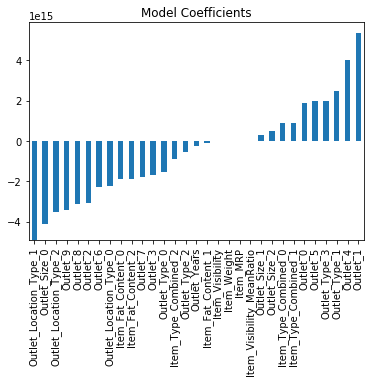

In [76]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
%matplotlib inline
import matplotlib.pyplot as plt
predictors = [x for x in train.columns if x not in [target]+IDcol]
# print predictors
alg1 = LinearRegression(normalize=True)
modelfit(alg1, train, test, predictors, target, IDcol, 'alg1.csv')
coef1 = pd.Series(alg1.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

Since the coefficients are very different from eachother, showing a great magnitude, let's try to optimize this model to avoid overfitting by using a ridge regression model:<br>
** RIDGE REGRESSION MODEL: **


Model Report
RMSE : 1129
CV Score : Mean - 1130 | Std - 44.34 | Min - 1076 | Max - 1217


c:\users\everm\appdata\local\programs\python\python36\lib\site-packages\ipykernel\__main__.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


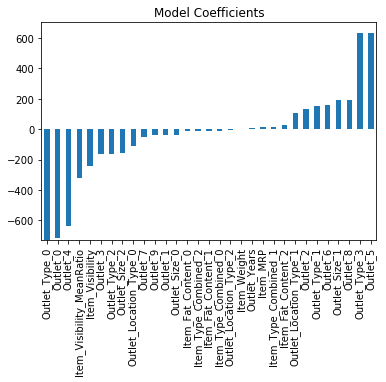

In [37]:
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg2 = Ridge(alpha=0.05,normalize=True)
modelfit(alg2, train, test, predictors, target, IDcol, 'alg2.csv')
coef2 = pd.Series(alg2.coef_, predictors).sort_values()
coef2.plot(kind='bar', title='Model Coefficients')

There is not much difference between the last cv score, so a different model should be applied in order to try to improve our score.<br>Let's try a decision tree model:
** DECISION TREE MODEL 1: **


Model Report
RMSE : 1058
CV Score : Mean - 1091 | Std - 45.42 | Min - 1003 | Max - 1186


c:\users\everm\appdata\local\programs\python\python36\lib\site-packages\ipykernel\__main__.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


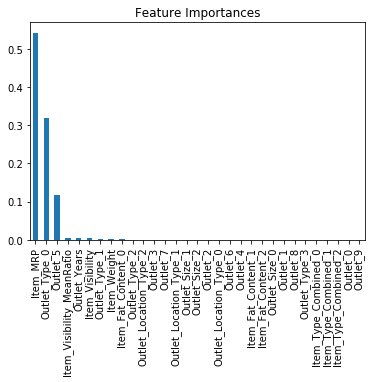

In [77]:
from sklearn.tree import DecisionTreeRegressor

predictors = [x for x in train.columns if x not in [target]+IDcol]
alg3 = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
modelfit(alg3, train, test, predictors, target, IDcol, 'alg3.csv')
coef3 = pd.Series(alg3.feature_importances_, predictors).sort_values(ascending=False)
coef3.plot(kind='bar', title='Feature Importances')

This model still shows some magnitude between coefficients so we can try others parameters in another decision tree model with 4 features, a max-depth of 8 150 leaves.<br>
** DECISION TREE MODEL 2: **


Model Report
RMSE : 1071
CV Score : Mean - 1096 | Std - 43.3 | Min - 1027 | Max - 1172


c:\users\everm\appdata\local\programs\python\python36\lib\site-packages\ipykernel\__main__.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


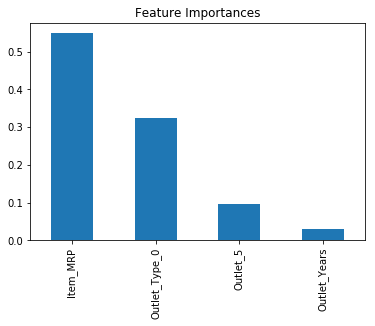

In [78]:
predictors = ['Item_MRP','Outlet_Type_0','Outlet_5','Outlet_Years']
alg4 = DecisionTreeRegressor(max_depth=8, min_samples_leaf=150)
modelfit(alg4, train, test, predictors, target, IDcol, 'alg4.csv')
coef4 = pd.Series(alg4.feature_importances_, predictors).sort_values(ascending=False)
coef4.plot(kind='bar', title='Feature Importances')

RMSE is less performant in this case. So let's switch to a random forest model<br>
** RANDOM FOREST MODEL 1: **


Model Report
RMSE : 1073
CV Score : Mean - 1083 | Std - 43.72 | Min - 1020 | Max - 1162


c:\users\everm\appdata\local\programs\python\python36\lib\site-packages\ipykernel\__main__.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


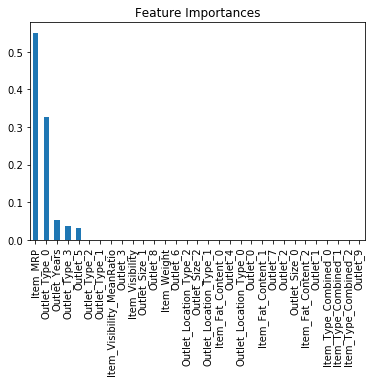

In [79]:
from sklearn.ensemble import RandomForestRegressor

predictors = [x for x in train.columns if x not in [target]+IDcol]
alg5 = RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4)
modelfit(alg5, train, test, predictors, target, IDcol, 'alg5.csv')
coef5 = pd.Series(alg5.feature_importances_, predictors).sort_values(ascending=False)
coef5.plot(kind='bar', title='Feature Importances')

Our CV score has not evolved much. Let's try other parameters:
** RANDOM FOREST MODEL 2:**


Model Report
RMSE : 1068
CV Score : Mean - 1083 | Std - 43.86 | Min - 1018 | Max - 1161


c:\users\everm\appdata\local\programs\python\python36\lib\site-packages\ipykernel\__main__.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


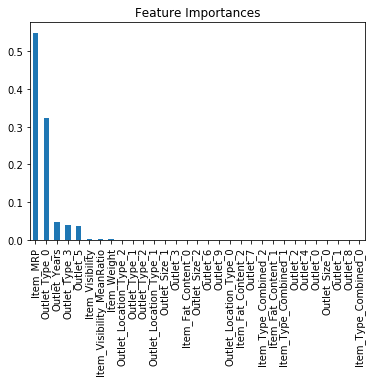

In [80]:
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg6 = RandomForestRegressor(n_estimators=400,max_depth=6, min_samples_leaf=100,n_jobs=4)
modelfit(alg6, train, test, predictors, target, IDcol, 'alg6.csv')
coef6 = pd.Series(alg6.feature_importances_, predictors).sort_values(ascending=False)
coef6.plot(kind='bar', title='Feature Importances')

CV Score is slightly better. We can keep this model.<br> We'll study later some GBM, XGBoost and ensemble techniques to see if those algorythms allows us to reach better performance.